test:0.4775  train:0.51
test:0.4875  train:0.38
test:0.4675  train:0.53
test:0.4825  train:0.57
test:0.44  train:0.54
test:0.415  train:0.59
test:0.4575  train:0.58
test:0.46  train:0.48
test:0.415  train:0.61
test:0.4775  train:0.6
test:0.4875  train:0.58
test:0.49  train:0.37
test:0.46  train:0.67
test:0.4175  train:0.64
test:0.44  train:0.58
test:0.465  train:0.58
test:0.4675  train:0.68
test:0.4275  train:0.67
test:0.4775  train:0.73
test:0.45  train:0.73
test:0.44  train:0.7
test:0.46  train:0.76
test:0.46  train:0.72
test:0.475  train:0.76
test:0.4875  train:0.7
test:0.465  train:0.6
test:0.43  train:0.72
test:0.4825  train:0.72
test:0.475  train:0.73
test:0.4375  train:0.72
test:0.4825  train:0.7
test:0.445  train:0.79
test:0.4975  train:0.75
test:0.5025  train:0.69
test:0.48  train:0.63
test:0.4625  train:0.73
test:0.455  train:0.76
test:0.4925  train:0.77
test:0.4925  train:0.74
test:0.475  train:0.72
test:0.4675  train:0.72
test:0.48  train:0.73
test:0.505  train:0.78
test:0.

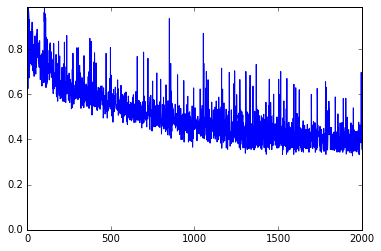

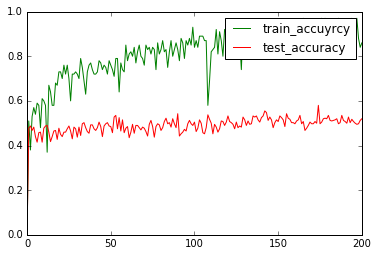

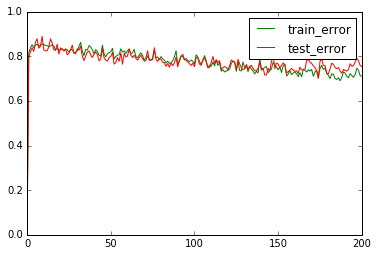

In [1]:
# -*- coding: utf-8 -*-
# View more python tutorial on my Youtube and Youku channel!!!

# Youtube video tutorial: https://www.youtube.com/channel/UCdyjiB5H8Pu7aDTNVXTTpcg
# Youku video tutorial: http://i.youku.com/pythontutorial

"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import tensorflow as tf
import numpy as np
import random
from sklearn import preprocessing
import matplotlib.pyplot as plt
try:
    import cPickle as pickle  # Improve speed
except ValueError:
    import pickle

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,5,1], strides=[1,2,5,1], padding='SAME')

f = open('CNN_stft_2000', 'rb')
tr_features = pickle.load(f) 
tr_labels = pickle.load(f)
ts_features = pickle.load(f)
ts_labels = pickle.load(f)
#tr_features = preprocessing.minmax_scale(tr_features)
#ts_features = preprocessing.minmax_scale(ts_features)
#tr_features = tr_features.tolist()
#tr_labels = tr_labels.tolist()
#ts_features = ts_features.tolist()
#ts_labels = ts_labels.tolist()
# define placeholder for inputs to network

xs = tf.placeholder(tf.float32, [None, 30*1024]) # 28x28
ys = tf.placeholder(tf.float32, [None, 2])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 30, 1024, 1])
batch_size = 100
training_epochs=2000
Loss_history = np.empty(shape=[1],dtype=float)
Train_history = np.empty(shape=[1],dtype=float)
Test_history = np.empty(shape=[1],dtype=float)
prediction_history = np.empty(shape=[400,2],dtype=float)
Train_error = np.empty(shape=[1],dtype=float)
Test_error = np.empty(shape=[1],dtype=float)
# print(x_image.shape)  # [n_samples, 28,28,1]

## conv1 layer ##
W_conv1 = weight_variable([5,5, 1,2]) # patch 5x5, in size 1, out size 
b_conv1 = bias_variable([2])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 30x1025x16
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')   # output size 15x205x16
h_pool1 = tf.contrib.layers.layer_norm(h_pool1)
## conv2 layer ##
W_conv2 = weight_variable([5,5, 2, 4]) # patch 5x5, in size 16, out size 32
b_conv2 = bias_variable([4])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # output size 15x205x32
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1,3,2,1], strides=[1,3,2,1], padding='SAME')# output size 5x41x12
h_pool2 = tf.contrib.layers.layer_norm(h_pool2)
## conv3 layer ##
#W_conv3 = weight_variable([3,3, 8, 16]) # patch 5x5, in size 16, out size 32
#b_conv3 = bias_variable([16])
#h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3) # output size 15x205x32
#h_pool3 = tf.nn.max_pool(h_conv3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')# output size 5x41x12
#h_pool3 = tf.contrib.layers.layer_norm(h_pool3)
## fc1 layer ##
W_fc1 = weight_variable([5*256*4, 1024])
b_fc1 = bias_variable([1024])
# [n_samples, 5, 41, 12] ->> [n_samples, 5*41*12]
h_pool2_flat = tf.reshape(h_pool2, [-1, 5*256*4])
#h_pool2_flat = tf.contrib.layers.batch_norm(h_pool2_flat) #normalization
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1 = tf.contrib.layers.batch_norm(h_fc1) #normalization
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## fc2 layer ##
#W_fc2 = weight_variable([1024, 1024])
#b_fc2 = bias_variable([1024])
#h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
#h_fc2 = tf.contrib.layers.batch_norm(h_fc2) #normalization
#h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

#fc3 layer
W_fc3 = weight_variable([1024, 2])
b_fc3 = bias_variable([2])
#h_fc2_drop = tf.contrib.layers.layer_norm(h_fc2_drop) #normalization
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc3) + b_fc3)
# the error between prediction and real data

cross_entropy = tf.losses.softmax_cross_entropy(ys,prediction)
#tf.summary(cross_entropy,'loss')                                                    # loss
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

sess = tf.Session()
# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
#if int((tf.__version__).split('.')[1]) < 12:
#    init = tf.initialize_all_variables()
#else:


init = tf.global_variables_initializer()
sess.run(init)

for i in range(training_epochs):
#    batch_xs = tf.train.batch(tr_features,batch_size=batch_size)
#    batch_ys = tf.train.batch(tr_labels,batch_size=batch_size)
    random_num = random.randint(0,1900)
    _,Loss = sess.run([train_step,cross_entropy], feed_dict={xs: tr_features[random_num:random_num+batch_size], ys: tr_labels[random_num:random_num+batch_size], keep_prob: 0.5})
    Loss_history = np.append(Loss_history,Loss)

    if i % 10 == 0:
#        random_num2 = random.randint(0,300)
        test_xs = ts_features
        test_ys = ts_labels
        Train_loss = sess.run(cross_entropy,feed_dict={xs:tr_features,ys:tr_labels,keep_prob:1.0})
        Test_loss = sess.run(cross_entropy,feed_dict={xs:ts_features,ys:ts_labels,keep_prob:1.0})
        train_accuracy = compute_accuracy(tr_features[random_num:random_num+batch_size],tr_labels[random_num:random_num+batch_size])
#        test_accuracy = compute_accuracy(ts_features[random_num2:random_num2+batch_size],ts_labels[random_num2:random_num2+batch_size])
        test_accuracy = compute_accuracy(test_xs,test_ys)
        print("test:%s  train:%s"%(test_accuracy,train_accuracy))
        Train_history = np.append(Train_history,train_accuracy)
        Test_history = np.append(Test_history,test_accuracy)
        Train_error = np.append(Train_error,Train_loss)
        Test_error = np.append(Test_error,Test_loss)
fig = plt.figure()
plt.plot(Loss_history)
plt.axis([0,training_epochs,0,np.max(Loss_history)])
plt.show()    
fig = plt.figure()
plt.plot(Train_history,"g-",label="train_accuyrcy")
plt.plot(Test_history,"r-",label="test_accuracy")
plt.axis([0,training_epochs/10,0,1])
plt.legend()
plt.show()
fig = plt.figure()
plt.plot(Train_error,"g-",label="train_error")
plt.plot(Test_error,"r-",label="test_error")
plt.axis([0,training_epochs/10,0,1])
plt.legend()
plt.show()
#prediction_history = sess.run(prediction,feed_dict={xs: test_xs,ys: test_ys,keep_prob:1.0})